In [1]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
import numpy as np
from numpy import quantile, where
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.cluster import KMeans

# Understanding the Data

<h3>Context</h3>

In [2]:
data = pd.read_csv('VAT_Dataset.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98787 entries, 0 to 98786
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   RETURN_ID                  98786 non-null  float64
 1   TPIN                       98786 non-null  float64
 2   RETURN_AMOUNT              98785 non-null  float64
 3   NUMBER_OF_OUTPUT_INVOICES  98785 non-null  float64
 4   SUM_OF_OUTPUT_INVOICES     98785 non-null  float64
 5   NUMBER_OF_INPUT_INVOICES   98785 non-null  float64
 6   SUM_OF_INPUT_INVOICES      98785 non-null  float64
 7   REFUND_STATUS              9728 non-null   object 
 8   REFUND_AMOUNT_CLAIMED      9728 non-null   float64
 9   REFUND_AMOUNT_PAID         9728 non-null   float64
 10  REFUND_ID                  9728 non-null   float64
 11  CREDIT_RETURN              98785 non-null  float64
 12  REFUND_CREATED             98785 non-null  float64
 13  REFUND_APPROVED            98785 non-null  flo

In [4]:
data.columns[:50]

Index(['RETURN_ID', 'TPIN', 'RETURN_AMOUNT', 'NUMBER_OF_OUTPUT_INVOICES',
       'SUM_OF_OUTPUT_INVOICES', 'NUMBER_OF_INPUT_INVOICES',
       'SUM_OF_INPUT_INVOICES', 'REFUND_STATUS', 'REFUND_AMOUNT_CLAIMED',
       'REFUND_AMOUNT_PAID', 'REFUND_ID', 'CREDIT_RETURN', 'REFUND_CREATED',
       'REFUND_APPROVED', 'REJECTED_REFUNDS'],
      dtype='object')

In [ ]:
data.columns[51:100]

Index([], dtype='object')

In [ ]:
data.columns[101:]

Index([], dtype='object')

In [ ]:
data

,RETURN_ID,TPIN,RETURN_AMOUNT,NUMBER_OF_OUTPUT_INVOICES,SUM_OF_OUTPUT_INVOICES,NUMBER_OF_INPUT_INVOICES,SUM_OF_INPUT_INVOICES,REFUND_STATUS,REFUND_AMOUNT_CLAIMED,REFUND_AMOUNT_PAID,REFUND_ID,CREDIT_RETURN,REFUND_CREATED,REFUND_APPROVED,REJECTED_REFUNDS
0,6458.0,1.002031e+09,2898.89,0.0,0.00,2.0,18118.08,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN
1,7219.0,1.003131e+09,6064.15,0.0,0.00,2.0,0.00,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN
2,7371.0,1.001976e+09,479.50,4.0,25477.99,3.0,28474.88,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN
3,7608.0,1.001787e+09,1205.01,0.0,0.00,1.0,7531.31,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN
4,7700.0,1.005474e+09,-112.30,36.0,78730.82,106.0,139275.41,FULLY_PAID_MANUALLY,112.3,112.3,1588.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115429,2285593.0,1.002924e+09,1616.85,15.0,79853.16,32.0,89958.48,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN
115430,2285635.0,2.322185e+09,1757.44,2.0,1822956.03,2.0,1833940.00,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN
115431,2285639.0,1.019751e+09,165145.87,94.0,4918914.78,4.0,6103902.26,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN
115432,2285671.0,2.605738e+09,192.00,0.0,0.00,1.0,1200.00,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN


In [ ]:
data['RETURN_AMOUNT'].describe()

count    1.154320e+05
mean    -1.039526e+05
std      5.669665e+06
min     -7.118001e+08
25%      1.742550e+02
50%      3.141555e+03
75%      2.328000e+04
max      1.433655e+08
Name: RETURN_AMOUNT, dtype: float64

In [ ]:
data['RETURN_AMOUNT'].value_counts()

 0.00         2410
 2400.00        49
-0.01           41
 480.00         32
 8000.00        31
              ... 
 165690.50       1
 655.51          1
 12000.69        1
 32.66           1
 165145.87       1
Name: RETURN_AMOUNT, Length: 107619, dtype: int64

In [ ]:
isfraud_ = data['SUM_OF_OUTPUT_INVOICES']

<h3>Visualisation</h3>

Text(0.5, 1.0, 'Count of input VS Output')

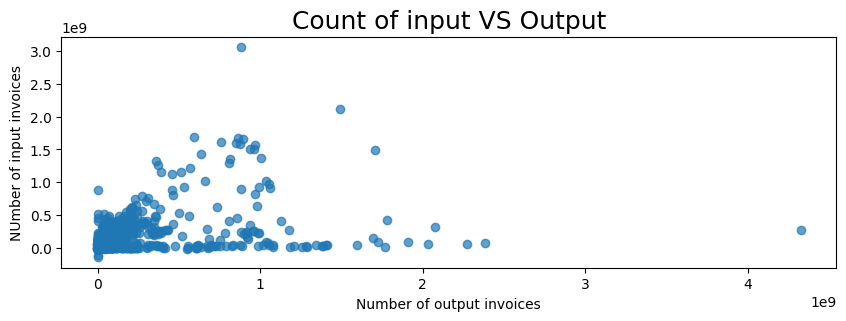

In [ ]:
plt.figure(figsize=(10,3))
plt.scatter(data['SUM_OF_OUTPUT_INVOICES'],data['SUM_OF_INPUT_INVOICES'],alpha=0.7)
plt.xlabel('Number of output invoices')
plt.ylabel('NUmber of input invoices')
plt.title('Count of input VS Output',size=18)

Text(0.5, 1.0, 'Count of climed VS paid')

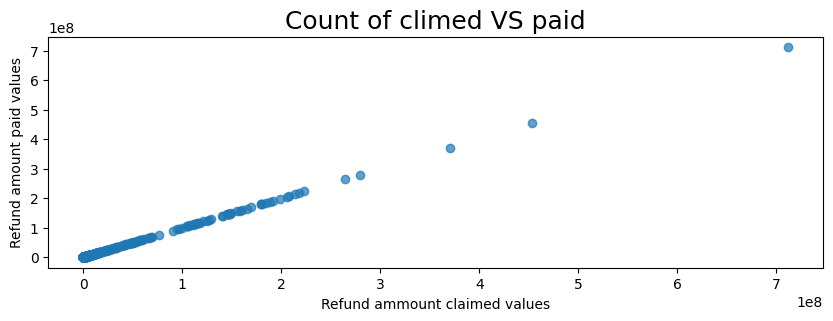

In [ ]:
plt.figure(figsize=(10,3))
plt.scatter(data['REFUND_AMOUNT_CLAIMED'],data['REFUND_AMOUNT_PAID'],alpha=0.7)
plt.xlabel('Refund ammount claimed values')
plt.ylabel('Refund amount paid values')
plt.title('Count of climed VS paid',size=18)

<Axes: >

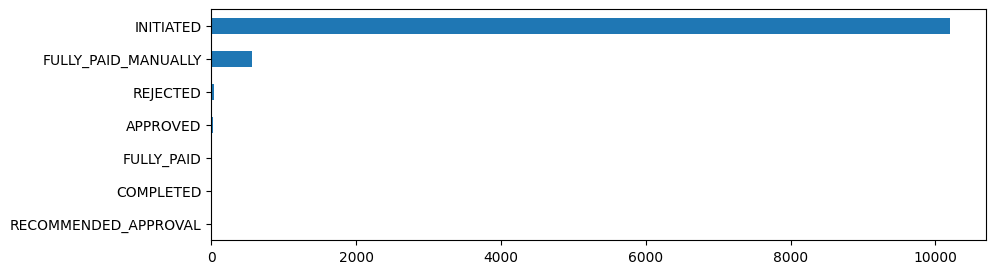

In [ ]:
plt.figure(figsize=(10,3))
data['REFUND_STATUS'].value_counts().sort_values(ascending=True).plot(kind='barh')

Text(0.5, 1.0, 'Number of refund by tax')

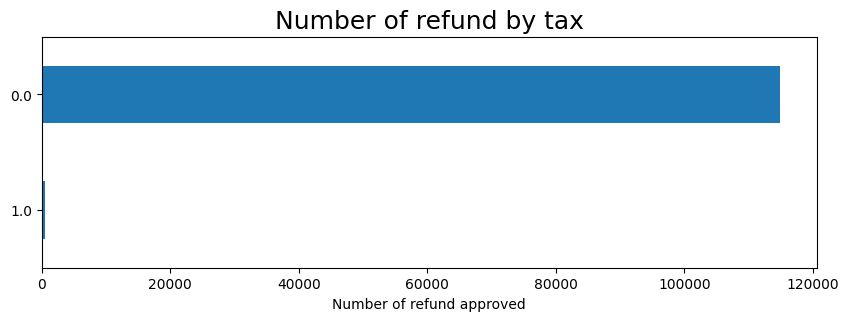

In [ ]:
plt.figure(figsize=(10,3))
data['REFUND_APPROVED'].value_counts().sort_values(ascending=True).plot(kind='barh')
plt.xlabel('Number of refund approved')
plt.title('Number of refund by tax',size=18)

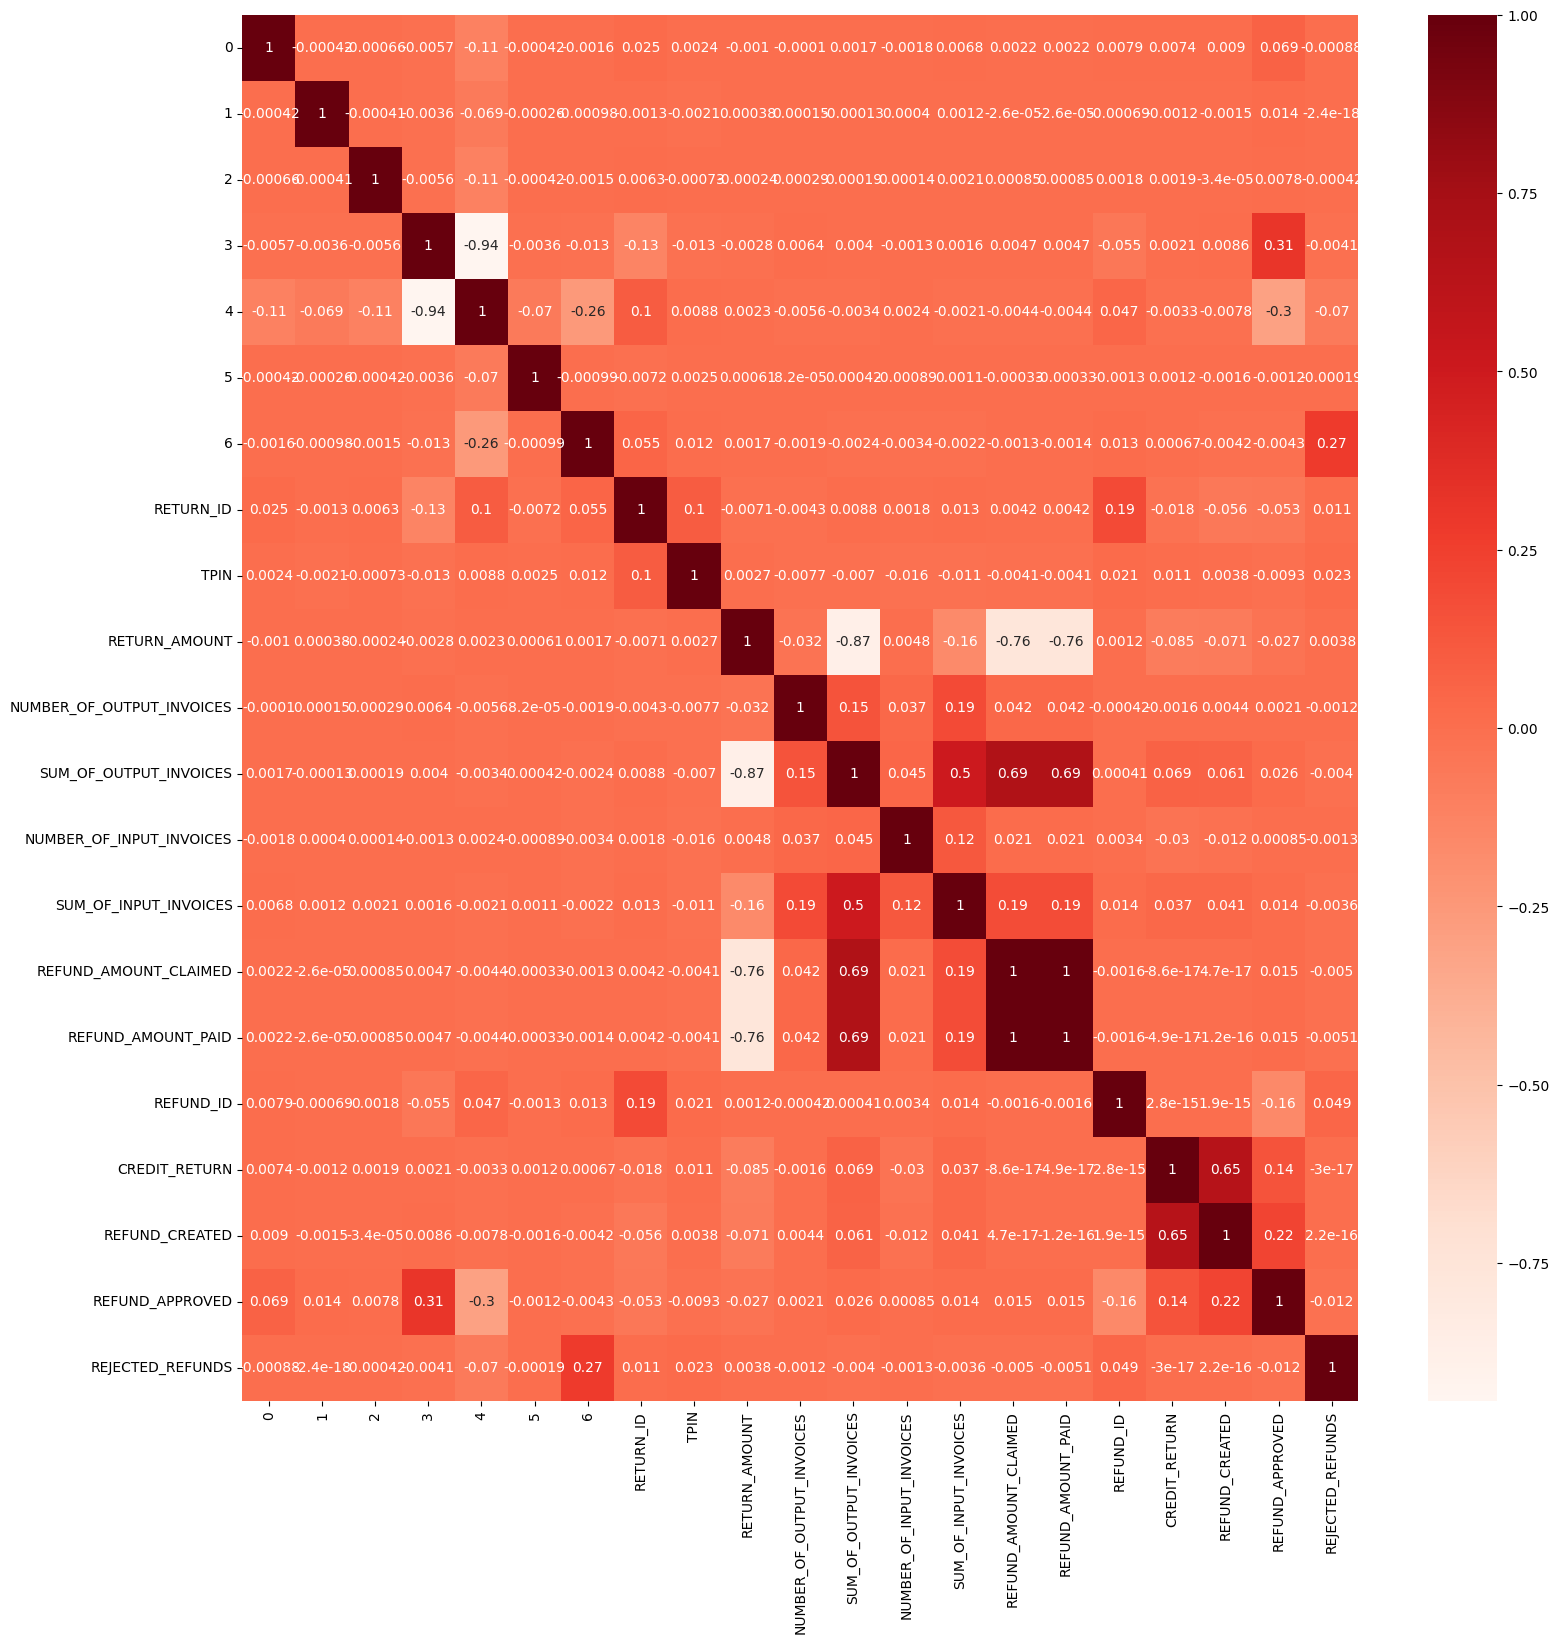

In [ ]:
plt.figure(figsize=(18,18))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

Text(0, 0.5, 'Number of Input invoices')

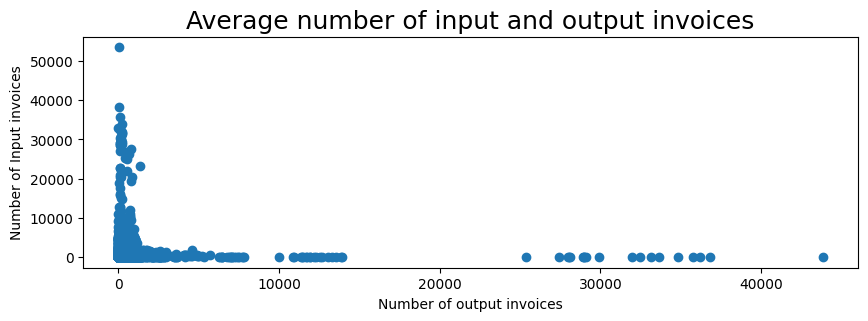

In [ ]:
plt.figure(figsize=(10,3))
plt.title('Average number of input and output invoices',size=18)
plt.scatter(data['NUMBER_OF_OUTPUT_INVOICES'],data['NUMBER_OF_INPUT_INVOICES'])
plt.xlabel('Number of output invoices')
plt.ylabel('Number of Input invoices')

<Axes: >

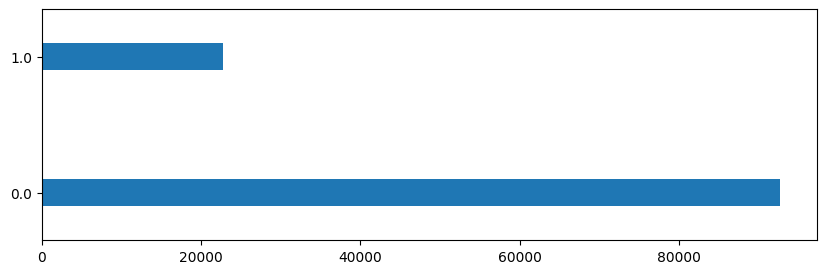

In [ ]:
plt.figure(figsize=(10,3))
data['CREDIT_RETURN'].value_counts().plot(kind='barh',width=0.2)

Text(0.5, 1.0, 'A distribution with a median build time higher than the mean')

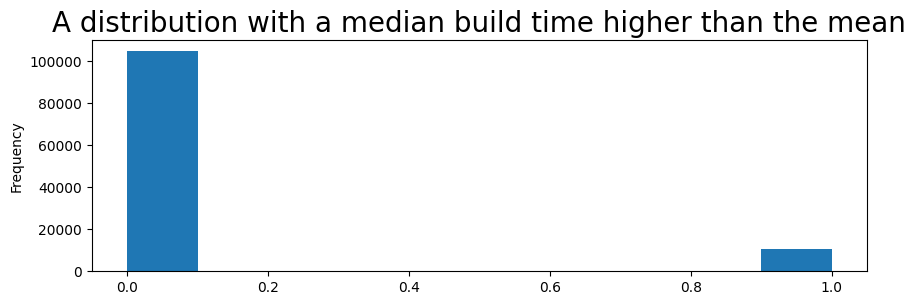

In [ ]:
plt.figure(figsize=(10,3))
data['REFUND_CREATED'].plot(kind='hist')
plt.title('A distribution with a median build time higher than the mean',size=20)

In [ ]:
data['REFUND_CREATED'].median(),data['REFUND_CREATED'].mean()

(0.0, 0.09372617645020445)

# Preprocessing

<h3>Feature Engineering</h3>

In [ ]:
data.isnull().sum()[:50]

RETURN_ID                         1
TPIN                              1
RETURN_AMOUNT                     2
NUMBER_OF_OUTPUT_INVOICES         2
SUM_OF_OUTPUT_INVOICES            2
NUMBER_OF_INPUT_INVOICES          2
SUM_OF_INPUT_INVOICES             2
REFUND_STATUS                104615
REFUND_AMOUNT_CLAIMED        104615
REFUND_AMOUNT_PAID           104615
REFUND_ID                    104615
CREDIT_RETURN                     2
REFUND_CREATED                    2
REFUND_APPROVED                   2
REJECTED_REFUNDS             104617
dtype: int64

In [ ]:
data.isnull().sum()[51:100]

Series([], dtype: int64)

In [ ]:
data.isnull().sum()[101:]

Series([], dtype: int64)

In [ ]:
data.isnull().sum()[:50]

RETURN_ID                         1
TPIN                              1
RETURN_AMOUNT                     2
NUMBER_OF_OUTPUT_INVOICES         2
SUM_OF_OUTPUT_INVOICES            2
NUMBER_OF_INPUT_INVOICES          2
SUM_OF_INPUT_INVOICES             2
REFUND_STATUS                104615
REFUND_AMOUNT_CLAIMED        104615
REFUND_AMOUNT_PAID           104615
REFUND_ID                    104615
CREDIT_RETURN                     2
REFUND_CREATED                    2
REFUND_APPROVED                   2
REJECTED_REFUNDS             104617
dtype: int64

In [ ]:
data.isnull().sum()[51:]

Series([], dtype: int64)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115434 entries, 0 to 115433
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   RETURN_ID                  115433 non-null  float64
 1   TPIN                       115433 non-null  float64
 2   RETURN_AMOUNT              115432 non-null  float64
 3   NUMBER_OF_OUTPUT_INVOICES  115432 non-null  float64
 4   SUM_OF_OUTPUT_INVOICES     115432 non-null  float64
 5   NUMBER_OF_INPUT_INVOICES   115432 non-null  float64
 6   SUM_OF_INPUT_INVOICES      115432 non-null  float64
 7   REFUND_STATUS              10819 non-null   object 
 8   REFUND_AMOUNT_CLAIMED      10819 non-null   float64
 9   REFUND_AMOUNT_PAID         10819 non-null   float64
 10  REFUND_ID                  10819 non-null   float64
 11  CREDIT_RETURN              115432 non-null  float64
 12  REFUND_CREATED             115432 non-null  float64
 13  REFUND_APPROVED            11

<h3>Category data</h3>

In [ ]:
cats = data.select_dtypes(include='object')

In [ ]:
cats.fillna(method='ffill',inplace=True)
cats.fillna(method='bfill',inplace=True)

In [ ]:
cats.isnull().sum()

REFUND_STATUS    0
dtype: int64

In [ ]:
data.drop(columns=cats.columns,inplace=True)

<h3>Numerical Data</h3>

In [ ]:
data.fillna(data.mean(),inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115434 entries, 0 to 115433
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   RETURN_ID                  115434 non-null  float64
 1   TPIN                       115434 non-null  float64
 2   RETURN_AMOUNT              115434 non-null  float64
 3   NUMBER_OF_OUTPUT_INVOICES  115434 non-null  float64
 4   SUM_OF_OUTPUT_INVOICES     115434 non-null  float64
 5   NUMBER_OF_INPUT_INVOICES   115434 non-null  float64
 6   SUM_OF_INPUT_INVOICES      115434 non-null  float64
 7   REFUND_AMOUNT_CLAIMED      115434 non-null  float64
 8   REFUND_AMOUNT_PAID         115434 non-null  float64
 9   REFUND_ID                  115434 non-null  float64
 10  CREDIT_RETURN              115434 non-null  float64
 11  REFUND_CREATED             115434 non-null  float64
 12  REFUND_APPROVED            115434 non-null  float64
 13  REJECTED_REFUNDS           11

In [ ]:
ohe = OneHotEncoder(sparse=False,handle_unknown='ignore')
cats = ohe.fit_transform(cats)
cats = pd.DataFrame(cats)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
data = cats.join(data)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115434 entries, 0 to 115433
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   0                          115434 non-null  float64
 1   1                          115434 non-null  float64
 2   2                          115434 non-null  float64
 3   3                          115434 non-null  float64
 4   4                          115434 non-null  float64
 5   5                          115434 non-null  float64
 6   6                          115434 non-null  float64
 7   RETURN_ID                  115434 non-null  float64
 8   TPIN                       115434 non-null  float64
 9   RETURN_AMOUNT              115434 non-null  float64
 10  NUMBER_OF_OUTPUT_INVOICES  115434 non-null  float64
 11  SUM_OF_OUTPUT_INVOICES     115434 non-null  float64
 12  NUMBER_OF_INPUT_INVOICES   115434 non-null  float64
 13  SUM_OF_INPUT_INVOICES      11

<h3>Scaling</h3>

In [ ]:
data.columns = data.columns.astype(str)
scaler = MinMaxScaler()
clean = scaler.fit_transform(data)
train = pd.DataFrame(clean)


In [ ]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.335082,0.832357,...,0.001741,0.000037,0.044029,1.901015e-03,1.900839e-03,0.183159,0.0,0.0,0.0,0.002866
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000334,0.335450,0.832361,...,0.001741,0.000037,0.044023,1.901015e-03,1.900839e-03,0.183159,0.0,0.0,0.0,0.002866
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000401,0.335064,0.832354,...,0.001746,0.000056,0.044032,1.901015e-03,1.900839e-03,0.183159,0.0,0.0,0.0,0.002866
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000505,0.335001,0.832355,...,0.001741,0.000019,0.044025,1.901015e-03,1.900839e-03,0.183159,0.0,0.0,0.0,0.002866
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000545,0.336234,0.832353,...,0.001759,0.001981,0.044067,1.577550e-07,1.577690e-07,0.022271,1.0,1.0,1.0,0.000000


# Model Training

<h3>Local Outlier Factor</h3>

In [ ]:
lof = LocalOutlierFactor(n_jobs=-1)

In [ ]:
ol_preds = lof.fit_predict(train)

In [ ]:
pickle.dump(lof,open('LOF-Trained.mod','wb'))

In [ ]:
scores = pd.Series(ol_preds)

In [ ]:
scores.value_counts()

 1    98628
-1    16806
dtype: int64

<h3>Logistic Regression</h3>

In [ ]:

data = data.dropna(subset=['RETURN_ID'])


In [ ]:
print(isfraud_.isna().sum())


2


In [7]:
import seaborn as sns

# Load the Iris dataset
iris = pd.read_csv('VAT_Dataset.csv')

# Sample the data (optional)
iris_samples = iris.sample(n=75, replace=False, random_state=3)

# Extract features and target variable
X_iris = iris_samples.iloc[:, :4]
y_iris = iris_samples['RETURN_ID']


In [14]:
iris_samples.head()

,RETURN_ID,TPIN,RETURN_AMOUNT,NUMBER_OF_OUTPUT_INVOICES,SUM_OF_OUTPUT_INVOICES,NUMBER_OF_INPUT_INVOICES,SUM_OF_INPUT_INVOICES,REFUND_STATUS,REFUND_AMOUNT_CLAIMED,REFUND_AMOUNT_PAID,REFUND_ID,CREDIT_RETURN,REFUND_CREATED,REFUND_APPROVED,REJECTED_REFUNDS
220756,4661090.0,1.002981e+09,-45408.02,19.0,170127.35,31.0,255989.64,INITIATED,45408.02,45408.02,39966.0,1.0,1.0,0.0,0.0
171327,3582528.0,2.192617e+09,59945.20,8.0,538992.50,2.0,913650.00,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN
119679,2314492.0,1.001720e+09,322812.85,10.0,92878.95,680.0,2444278.51,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN
10069,183029.0,1.001641e+09,1392.54,12.0,21296.52,2.0,30000.00,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN
21655,378364.0,1.002621e+09,3206.09,1.0,5674.85,1.0,25712.93,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN


In [15]:
iris_model = KMeans(n_clusters=3)
iris_model.fit(X_iris)

iris_labels = iris_model.predict(X_iris)
iris_labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

**Clusters**

In [17]:
pen = pd.read_csv('VAT_Dataset.csv').dropna()

In [18]:
pen

,RETURN_ID,TPIN,RETURN_AMOUNT,NUMBER_OF_OUTPUT_INVOICES,SUM_OF_OUTPUT_INVOICES,NUMBER_OF_INPUT_INVOICES,SUM_OF_INPUT_INVOICES,REFUND_STATUS,REFUND_AMOUNT_CLAIMED,REFUND_AMOUNT_PAID,REFUND_ID,CREDIT_RETURN,REFUND_CREATED,REFUND_APPROVED,REJECTED_REFUNDS
4,7700.0,1.005474e+09,-112.30,36.0,78730.82,106.0,139275.41,FULLY_PAID_MANUALLY,112.30,112.30,1588.0,1.0,1.0,1.0,0.0
19,12145.0,1.002454e+09,-830.72,10.0,10383.94,1.0,8546.58,INITIATED,830.72,830.72,3119.0,1.0,1.0,0.0,0.0
22,13516.0,1.002619e+09,-1006.90,5.0,70775.85,6.0,81120.68,INITIATED,1006.90,1006.90,3388.0,1.0,1.0,0.0,0.0
23,13518.0,1.003995e+09,-11024.82,3.0,147844.82,4.0,78939.64,INITIATED,11024.82,11024.82,3389.0,1.0,1.0,0.0,0.0
37,15290.0,1.002519e+09,-7493.94,3.0,11030.69,25.0,161269.39,INITIATED,7493.94,7493.94,1594.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229062,4828641.0,1.002893e+09,-12575.88,59.0,158649.89,27.0,110588.28,INITIATED,12575.88,12575.88,41394.0,1.0,1.0,0.0,0.0
229064,4828656.0,1.001038e+09,-5068.26,30.0,56300.09,11.0,109813.45,INITIATED,5068.26,5068.26,41373.0,1.0,1.0,0.0,0.0
229091,4828816.0,2.685562e+09,-1613.20,13.0,10082.52,0.0,0.00,INITIATED,1613.20,1613.20,41397.0,1.0,1.0,0.0,0.0
229108,4828876.0,2.685562e+09,-767.18,8.0,4794.88,0.0,0.00,INITIATED,767.18,767.18,41398.0,1.0,1.0,0.0,0.0


In [19]:
points = pen.iloc[:, 2:4]
points.head()

,RETURN_AMOUNT,NUMBER_OF_OUTPUT_INVOICES
4,-112.30,36.0
19,-830.72,10.0
22,-1006.90,5.0
23,-11024.82,3.0
37,-7493.94,3.0


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


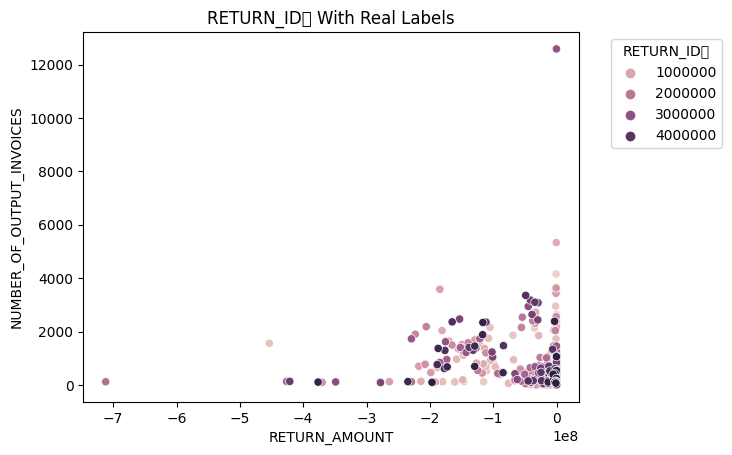

In [21]:
xs = points.RETURN_AMOUNT
ys = points.NUMBER_OF_OUTPUT_INVOICES

sns.scatterplot(x=xs, y=ys, hue=pen.RETURN_ID	)
plt.legend(title='RETURN_ID	', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('RETURN_ID	 With Real Labels')
plt.show()

In [22]:
# create points
points = pen.iloc[:, 2:4].sample(n=177, random_state=3)
new_points = pen[~pen.index.isin(points.index)].iloc[:, 2:4]

# Import KMeans
# from sklearn.cluster import KMeans

# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters=3)

# Fit model to points
model.fit(points)

labels = model.predict(points)

# Determine the cluster labels of new_points: labels
new_labels = model.predict(new_points)

# Print cluster labels of new_points
print(new_labels)

[0 0 0 ... 0 0 2]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [23]:
points.head()

,RETURN_AMOUNT,NUMBER_OF_OUTPUT_INVOICES
106213,-190639.43,34.0
60428,-26289.36,75.0
152500,-2775.75,5.0
50557,-21698.26,32.0
225711,-1995.32,2.0


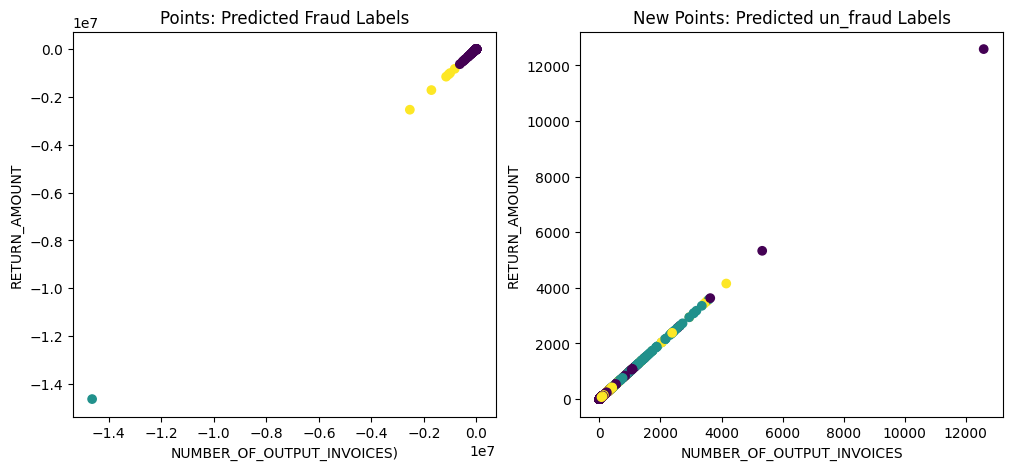

In [25]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

xs = points.RETURN_AMOUNT
ys = points.RETURN_AMOUNT
xs_new = new_points.NUMBER_OF_OUTPUT_INVOICES
ys_new = new_points.NUMBER_OF_OUTPUT_INVOICES

ax1.scatter(xs, ys, c=labels)
ax1.set_ylabel('RETURN_AMOUNT')
ax1.set_xlabel('NUMBER_OF_OUTPUT_INVOICES)')
ax1.set_title('Points: Predicted Fraud Labels')

ax2.scatter(xs_new, ys_new, c=new_labels)
ax2.set_ylabel('RETURN_AMOUNT')
ax2.set_xlabel('NUMBER_OF_OUTPUT_INVOICES')
ax2.set_title('New Points: Predicted un_fraud Labels')
plt.show()

**Inspect your clustering**

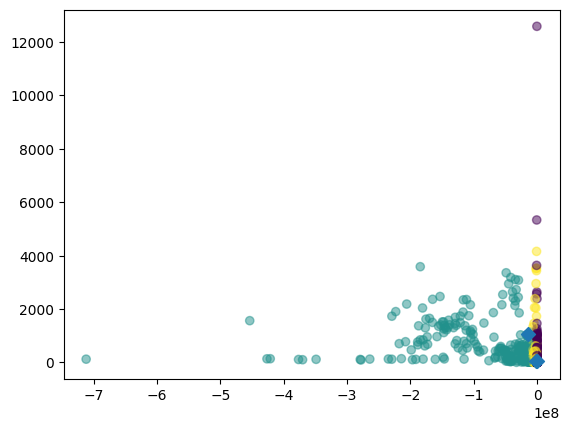

In [26]:
# Import pyplot
# import matplotlib.pyplot as plt

new_points = new_points.to_numpy()

# Assign the columns of new_points: xs and ys
xs = new_points[:, 0]
ys = new_points[:, 1]

# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs, ys, c=new_labels, alpha=0.5)

# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, centroids_y, marker='D', s=50)
plt.show()

**Evaluating a clustering**

In [31]:
iris_model.inertia_

3121038316928719.0

In [30]:

Sum_of_squared_distances = list()
K = range(1, 10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_iris)
    Sum_of_squared_distances.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

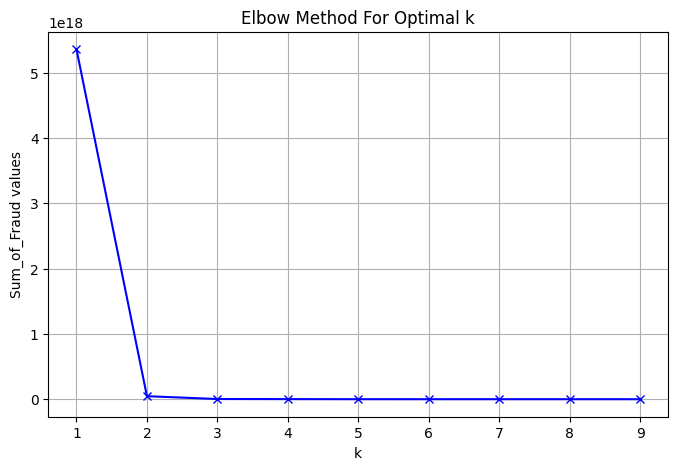

In [33]:
plt.figure(figsize=(8, 5))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_Fraud values')
plt.title('Elbow Method For Optimal k')
plt.grid()
plt.show()

**Cluster gain**

# Model Evaluation

<h3>Local Outlier Factor</h3>

In [ ]:
isfraud_.replace([0,1],[1,-1],inplace=True)

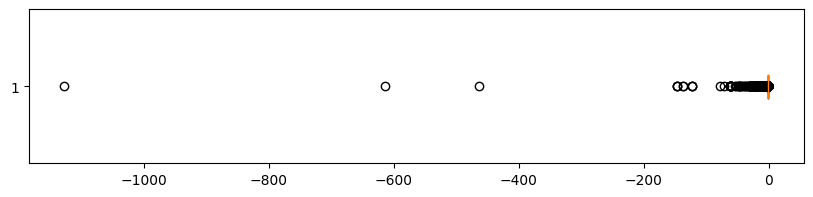

In [ ]:
plt.figure(figsize=(10,2))
plt.boxplot(lof.negative_outlier_factor_,vert=False)
plt.show()